In [26]:
from tensorflow import keras
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
from keras import layers, models

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
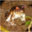

In [7]:
x_train[0]

In [8]:
x_train=x_train/255
x_test=x_test/255
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [9]:
y_train.shape

(50000,)

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(100,input_shape=(32*32,3,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2885 - loss: 1.9852
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3729 - loss: 1.7556
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3964 - loss: 1.7023
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4059 - loss: 1.6675
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4145 - loss: 1.6489


In [13]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4184 - loss: 1.6272


[1.6285722255706787, 0.4196000099182129]

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3822 - loss: 1.7007
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5981 - loss: 1.1523
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6514 - loss: 1.0030
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6820 - loss: 0.9090
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7116 - loss: 0.8319


In [17]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6689 - loss: 0.9671


[0.979124903678894, 0.6664000153541565]

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

In [19]:
cnn.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
   4/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6367 - loss: 1.0793 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6413 - loss: 1.0225 - val_accuracy: 0.6708 - val_loss: 0.9453
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.6563 - loss: 0.9831 - val_accuracy: 0.6679 - val_loss: 0.9848
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6632 - loss: 0.9582 - val_accuracy: 0.7021 - val_loss: 0.8701
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6729 - loss: 0.9372 - val_accuracy: 0.7113 - val_loss: 0.8628
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6772 - loss: 0.9190 - val_accuracy: 0.7014 - val_loss: 0.8831
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6851 - loss: 0.8978 - val_accuracy: 0.7196 - val_loss: 0.8269
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6962 - loss: 0.8715 - val_accuracy: 0.7096 - val_loss: 0.8658
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7020 - loss: 0.85

In [20]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6840 - loss: 0.9696


[0.9811456799507141, 0.678600013256073]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


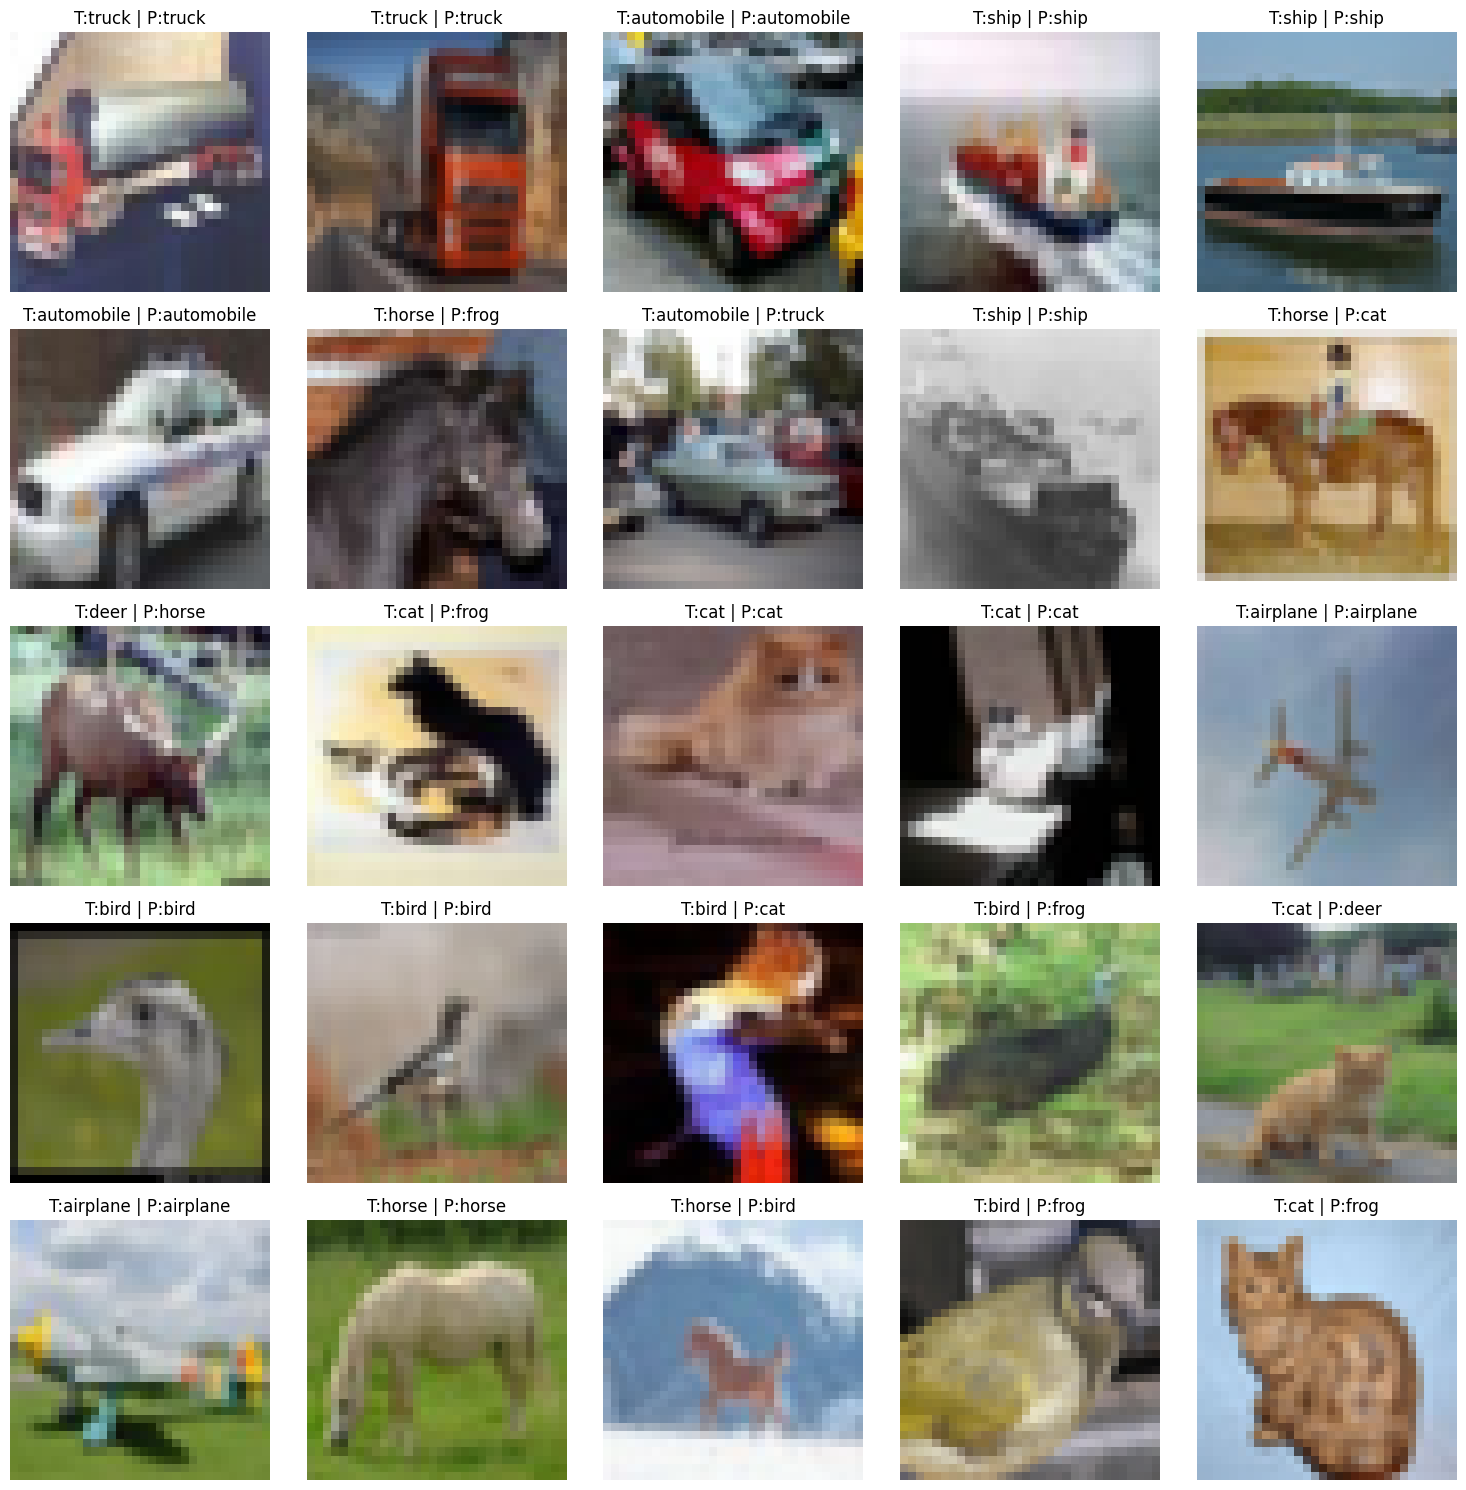

In [21]:
import matplotlib.pyplot as plt
import numpy as np
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Pick 25 random test images
num_images = 25
random_idx = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_idx):
    img = x_test[idx]
    true_label = y_test[idx]
    pred_label = np.argmax(cnn.predict(img.reshape(1, 32, 32, 3)))

    plt.subplot(5, 5, i + 1)
    plt.imshow(img.reshape(32, 32,3), cmap="gray")
    plt.title(f"T:{classes[true_label]} | P:{classes[pred_label]}")
    plt.axis("off")

plt.tight_layout()
plt.savefig("predictions.png")  # Saves the image in your Colab files
plt.show()


In [24]:
cnn.save("./save_model.h5")

In [30]:
# Load the model from the HDF5 file
loaded_model = tf.keras.models.load_model("./save_model.h5")

# Convert the loaded model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

Saved artifact at '/tmp/tmp5xkrfh40'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139210431364560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139210431363024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139210431361296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139210431363216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139210431361680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139210431361872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139210431362256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139210431359952: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [45]:
import os
model_path = "save_model.h5"
file_size_bytes = os.path.getsize(model_path)
file_size_mb = file_size_bytes / (1024 * 1024)
print(f"File size: {file_size_mb:.2f} MB")

File size: 1.95 MB


In [52]:
print(f"File size: {len(tflite_quant_model)/(1024*1024):.2f} MB")

File size: 0.17 MB


In [53]:
loaded_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6840 - loss: 0.9696


[0.9811456799507141, 0.678600013256073]

In [58]:
# Get input and output tensors.
input_details = light_model.get_input_details()
output_details = light_model.get_output_details()

# Test the model on the test set
predictions = []
for i in range(len(x_test)):
    input_data = np.array(x_test[i], dtype=np.float32)
    light_model.set_tensor(input_details[0]['index'], input_data.reshape(1, 32, 32, 3))
    light_model.invoke()
    output_data = light_model.get_tensor(output_details[0]['index'])
    predictions.append(np.argmax(output_data[0]))

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"TFLite model accuracy: {accuracy}")

TFLite model accuracy: 0.6789
